## 1. Importing libraries

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.insert(0, './modules')
from Data_prep import Data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 2. Define parameters required to create data

In [5]:
#define number of processors to use for parallel runs
num_procs = 4

#set verbose level for models
verbose_lvl = 0

#define input files
train_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\train_2016.csv'
properties_2016_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\properties_2016.csv'
test_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\train_2017.csv'
properties_2017_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\properties_2017.csv'


#define variables
cat_cols = ['hashottuborspa', 'propertycountylandusecode', 'fireplaceflag', 'taxdelinquencyflag']
num_cols = ['airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
        'propertylandusetypeid', 'regionidcity',
       'regionidcounty', 'roomcnt', 'storytypeid', 'threequarterbathnbr',
       'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyyear']
date_col = ['transactiondate']
target_col = 'logerror'
id_col = 'parcelid'

## 3. Creating a data object

In [6]:
data = Data(train_file, properties_2016_file, test_file, properties_2017_file , cat_cols, num_cols, date_col, target_col, id_col)

In [7]:
cols = list(set(data.train_df.columns).intersection(set(data.test_df.columns)))
data.train_df = data.train_df.loc[:,cols]
data.test_df = data.test_df.loc[:,cols]

In [8]:
data.train_df = data.train_df.sample(n = 10000,replace = True, random_state = 2)
data.train_df.shape

(10000, 119)

## 4. Train/test split

In [9]:
# Split Train/Test Set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data.train_df.drop(["logerror"], axis=1), data.train_df["logerror"],random_state=10, test_size=0.25)

## 5. Tuning hyperparmeters using learning curves 
## 5.1 Tuning max_depth 

## The optimal max_depth parameter is 20

1 depth
mse Train:  0.028178597687103783
mse Test:  0.038726713222745505
 
2 depth
mse Train:  0.02777436997721648
mse Test:  0.038313516691916634
 
3 depth
mse Train:  0.02686174356074575
mse Test:  0.03711440098657773
 
4 depth
mse Train:  0.02579327794346119
mse Test:  0.036214196242940526
 
5 depth
mse Train:  0.024418180011311626
mse Test:  0.0348694720402731
 
10 depth
mse Train:  0.01770303357633508
mse Test:  0.03165552227680925
 
20 depth
mse Train:  0.008343697934592406
mse Test:  0.03123710019589992
 
50 depth
mse Train:  0.00422917341209269
mse Test:  0.03163080547792945
 
100 depth
mse Train:  0.004224245583499372
mse Test:  0.03172393998786914
 


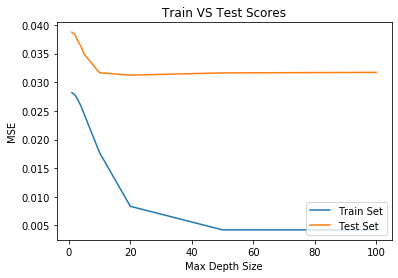

In [10]:
results  =  []
results2 = []
max_depth_size  = [1,2,3,4,5,10,20,50,100]

for depth in max_depth_size:
    model = RandomForestRegressor(max_depth = depth, oob_score=True, n_jobs=-1, random_state=44)
    #model.fit(X, y)
    model.fit(X_train_2, y_train_2)
    print(depth, 'depth')
    pred = model.predict(X_train_2)
    pred2 = model.predict(X_test_2)
    mse1 = metrics.mean_squared_error(y_train_2, pred)
    mse2 = metrics.mean_squared_error(y_test_2, pred2)
    print('mse Train: ', mse1)
    print('mse Test: ', mse2)
    results.append(mse1)
    results2.append(mse2)
    print (" ")

plt.plot(max_depth_size, results, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('MSE')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

## 6.2 Tuning n_estimators

## The optimal number of estimators is 100

1 estimator
mse Train:  0.023492109349333334
mse Test:  0.087989712004
 
2 estimator
mse Train:  0.011894490487666666
mse Test:  0.05004150322300001
 
3 estimator
mse Train:  0.009022361065185183
mse Test:  0.04410302222977778
 
4 estimator
mse Train:  0.007960819203583333
mse Test:  0.040507715687000005
 
5 estimator
mse Train:  0.0071982293816
mse Test:  0.038932693254400005
 
10 estimator
mse Train:  0.0053594629125175005
mse Test:  0.034023505413807505
 
20 estimator
mse Train:  0.004629049346103733
mse Test:  0.03240243562250835
 
50 estimator
mse Train:  0.003984873937302306
mse Test:  0.031443577561205305
 
100 estimator
mse Train:  0.004224245583499373
mse Test:  0.03172393998786914
 


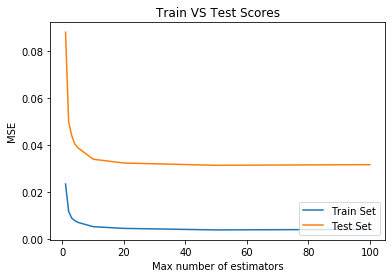

In [17]:
results  =  []
results2 = []
estimators  = [1,2,3,4,5,10,20,50,100]

for estimator in estimators:
    model = RandomForestRegressor(n_estimators = estimator, oob_score=True, n_jobs=-1, random_state=44)
    #model.fit(X, y)
    model.fit(X_train_2, y_train_2)
    print(estimator, 'estimator')
    pred = model.predict(X_train_2)
    pred2 = model.predict(X_test_2)
    mse1 = metrics.mean_squared_error(y_train_2, pred)
    mse2 = metrics.mean_squared_error(y_test_2, pred2)
    print('mse Train: ', mse1)
    print('mse Test: ', mse2)
    results.append(mse1)
    results2.append(mse2)
    print (" ")

plt.plot(max_depth_size, results, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max number of estimators')
plt.ylabel('MSE')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

## 5.3 Tuning max_features using OOB score 
## The optimal max_features is 0.7

auto option
oob:  -0.1981820947912294
 
None option
oob:  -0.1981820947912294
 
sqrt option
oob:  -0.1331008322551106
 
log2 option
oob:  -0.1342932804010608
 
0.7 option
oob:  -0.20093935412118125
 
0.2 option
oob:  -0.16333814362617272
 


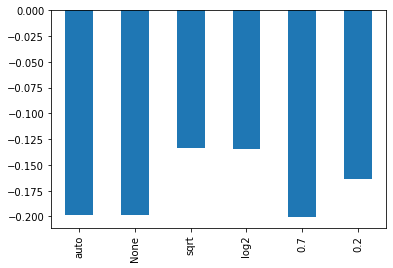

In [12]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.7, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=20, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train_2, y_train_2)
    print(max_features, "option")
    oob = model.oob_score_
    print('oob: ', oob)
    results.append(oob)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='bar')

## 5.4 Tuning min_samples_leaf using OOB score 

## The optimum min_samples_leaf is 6

1 min samples
oob:  -0.061718180322892335
 
2 min samples
oob:  -0.019806188499422728
 
3 min samples
oob:  -0.011518001616452889
 
4 min samples
oob:  -0.004290115930033922
 
5 min samples
oob:  -0.0032202815327817547
 
6 min samples
oob:  0.0015025698415838118
 
7 min samples
oob:  0.004085627702464123
 
8 min samples
oob:  0.002839084622363597
 
9 min samples
oob:  0.0023751249110390837
 
10 min samples
oob:  0.002282616370165802
 
20 min samples
oob:  0.005840030355982018
 


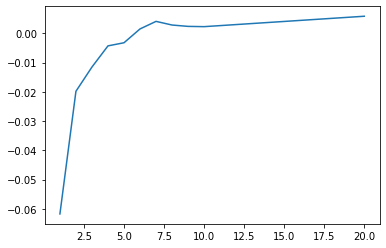

In [13]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features=0.7, min_samples_leaf=min_samples)
    model.fit(X_train_2, y_train_2)
    print(min_samples, "min samples")
    oob = model.oob_score_
    print('oob: ', oob)
    results.append(oob)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

## 6. Perform grid_search

In [18]:
model = RandomForestRegressor()

In [19]:
# Define Parameters
param_grid = {"max_depth": [18,20,22],
              "max_features" : [0.7,0.8],
              "min_samples_leaf" : [6,10,9],
              "n_estimators": [100,500,200]
             }

In [20]:
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(X_train_2, y_train_2)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  9.5min finished


In [22]:
gs_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features=0.7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)